# CS109A Final Project - Spotify Final Model

## Introduction - Features

In [1]:
import pandas as pd
import os
import glob
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import pd.rpy.common as com
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
import random
from collections import Counter
import pickle
%matplotlib inline

In [3]:
# get path to the folder
DATA_PATH = "../Songs_features/"
All_Files = glob.glob('{}*.csv'.format(DATA_PATH))

# Train Set

Split the playlist dataset 80-20 (training 80, test 20).Compute the average "duration_ms", "danceability", "energy", "key", "mode", "instrumentalness", "liveness", "valence", "tempo", and "popularity" for a playlist and save this values to a list.

In [4]:
train_files, test_files = train_test_split(All_Files, test_size=0.2, random_state=42)
params = ["duration_ms", "danceability", "energy", "key", "mode", "instrumentalness", "liveness", "valence", "tempo", "popularity"]
count = 0
playlist_mean_params = []
list_duration_ms = []
list_danceability = []
list_energy = []
list_key = []
list_mode = []
list_instrumentalness = []
list_liveness = []
list_valence = []
list_tempo = []
list_popularity = []
for n,file in enumerate(train_files[0:1000]):
    df_songs_temp = pd.read_csv(file)
    df_songs_temp = df_songs_temp.dropna()
            
    list_duration_ms = list_duration_ms + list(df_songs_temp.groupby('pid', as_index=True)[params[0]].mean().values)
    list_danceability = list_danceability + list(df_songs_temp.groupby('pid', as_index=True)[params[1]].mean().values)
    list_energy = list_energy + list(df_songs_temp.groupby('pid', as_index=True)[params[2]].mean().values)
    list_key = list_key + list(df_songs_temp.groupby('pid', as_index=True)[params[3]].mean().values)
    list_mode = list_mode + list(df_songs_temp.groupby('pid', as_index=True)[params[4]].mean().values)
    list_instrumentalness = list_instrumentalness + list(df_songs_temp.groupby('pid', as_index=True)[params[5]].mean().values)
    list_liveness = list_liveness + list(df_songs_temp.groupby('pid', as_index=True)[params[6]].mean().values)
    list_valence = list_valence + list(df_songs_temp.groupby('pid', as_index=True)[params[7]].mean().values)
    list_tempo = list_tempo + list(df_songs_temp.groupby('pid', as_index=True)[params[8]].mean().values)
    list_popularity = list_popularity + list(df_songs_temp.groupby('pid', as_index=True)[params[9]].mean().values)
    if (n+1) % 100 == 0:
        print((n+1), "files done!")

100 files done!
200 files done!
300 files done!
400 files done!
500 files done!
600 files done!
700 files done!
800 files done!


In [5]:
playlist_mean_params = []
for i in range(len(list_duration_ms)):
    playlist_mean_params.append([list_duration_ms[i],list_danceability[i],list_energy[i],list_key[i],list_mode[i],list_instrumentalness[i],list_liveness[i],list_valence[i],list_tempo[i],list_popularity[i]])

# Create labels for Playlists in train set
Find 100 clusters using k-means for the mean parameters of the playlists. Save these and the list of the means of the playlists for futher use using the commented out pickle command.

In [37]:
clusterer = KMeans(n_clusters=100, random_state=0)
clusterer.fit(playlist_mean_params)
cluster_labels = clusterer.fit_predict(playlist_mean_params)

In [41]:
#with open('playlist_mean_params_file_100.pkl', 'wb') as fp:
#    pickle.dump([playlist_mean_params,cluster_labels], fp)

# Create labels for Songs contained in Playlists in train set
For each song in the training set, we will find the playlist id and cluster id, and save everything as a dataframe

In [138]:
#we can load these instead of running any of the training data processing

with open('playlist_mean_params_file_100.pkl', 'rb') as f:
    playlist_mean_params, cluster_labels = pickle.load(f)
full_frame = pd.read_pickle("./full_frame_100.pkl")

In [ ]:
params2 = ["track_uri", "duration_ms", "danceability", "energy", "key", "mode", "instrumentalness", "liveness", "valence", "tempo", "popularity"]

In [ ]:
count = 0
super_df = []
list_track_uri = []
list_duration_ms = []
list_danceability = []
list_energy = []
list_key = []
list_mode = []
list_instrumentalness = []
list_liveness = []
list_valence = []
list_tempo = []
list_popularity = []
list_new_pid = []
list_cluster_id = []

for n,file in enumerate(train_files[0:1000]):
    df_songs_temp = pd.read_csv(file)
    df_songs_temp = df_songs_temp.dropna()
    
    list_track_uri = list_track_uri + list(df_songs_temp[params2[0]].values)
    list_duration_ms = list_duration_ms + list(df_songs_temp[params2[1]].values)
    list_danceability = list_danceability + list(df_songs_temp[params2[2]].values)
    list_energy = list_energy + list(df_songs_temp[params2[3]].values)
    list_key = list_key + list(df_songs_temp[params2[4]].values)
    list_mode = list_mode + list(df_songs_temp[params2[5]].values)
    list_instrumentalness = list_instrumentalness + list(df_songs_temp[params2[6]].values)
    list_liveness = list_liveness + list(df_songs_temp[params2[7]].values)
    list_valence = list_valence + list(df_songs_temp[params2[8]].values)
    list_tempo = list_tempo + list(df_songs_temp[params2[9]].values)
    list_popularity = list_popularity + list(df_songs_temp[params2[10]].values)
    list_new_pid = list_new_pid + list(df_songs_temp['pid'].values+n*1000)

    #df_songs_playlist_ids = list(set(df_songs_temp['pid']))
    #for play_id in df_songs_playlist_ids:
    #    list_cluster_id = list_cluster_id + [cluster_labels[count]]*len(df_songs_temp[df_songs_temp["pid"] == play_id])
    
    # check execution
    if (n+1) % 100 == 0:
        print((n+1), "files done!")
full_frame = pd.DataFrame(columns=["track_uri", "duration_ms", "danceability", "energy", "key", "mode", "instrumentalness", "liveness", "valence", "tempo", "popularity","new_pid","cluster_id"])
full_frame["track_uri"] = list_track_uri
full_frame["duration_ms"] = list_duration_ms
full_frame["danceability"] = list_danceability
full_frame["energy"] = list_energy
full_frame["key"] = list_key
full_frame["mode"] = list_mode
full_frame["instrumentalness"] = list_instrumentalness
full_frame["liveness"] = list_liveness
full_frame["valence"] = list_valence
full_frame["tempo"] = list_tempo
full_frame["popularity"] = list_popularity
full_frame["new_pid"] = list_new_pid


This is not pretty but fixes an issue we were having with missing values for our new_pid paramer (representing the playlist id).

In [62]:
for index,i in enumerate(list_new_pid):
    if i>= 352030:
        list_new_pid[index] -= 1
        if i >= 352094:
            list_new_pid[index] -= 1
            if i >= 352185:
                list_new_pid[index] -= 1
                if i >= 352467:
                    list_new_pid[index] -= 1
                    if i >= 352560:
                        list_new_pid[index] -= 1
                        if i >= 352669:
                            list_new_pid[index] -= 1
                            if i >= 352867:
                                list_new_pid[index] -= 1
                                if i >= 352923:
                                    list_new_pid[index] -= 1
full_frame["new_pid"] = list_new_pid

Add the cluster id as column to the dataframe.

In [48]:
list_cluster_id = [cluster_labels[list_new_pid[idx]] for idx in range(len(full_frame))]
full_frame["cluster_id"] = list_cluster_id

In [49]:
#save the pickled dataframe for further use
#full_frame.to_pickle("./full_frame_100.pkl")

# Test set and Predictions
We now select a playlist from the test set and using a 60-40 split we create a seed playlist (60% of the songs in the selected test playlist) and test songs (40% of the songs in the selected test playlist). Based on the seed playlist, we determine to which of the 100 clusters it belongs. Once this is determined, we look for playlists (the training one that were previously assigned) within this cluster that show the largest overlap in songs with the seed playlist. A typical value that we considered for the minimum number of songs overlapping was 5. This value was chosen as tradeoff between the speed of the code and accuracy of the predictions as defined below. Once these playlists have been determined we then list all the songs that were part of these playlist, but not a member of the seed playlist. We refer to these songs as forming the possibility pool. The most frequently occurring songs in the possibility pool are the ones we use as predictions to add our seed playlist. The total number of songs predicted is of course equal to number of test songs.

In [171]:
prediction_accuracy = []
prediction_accuracy_total_songs = []
for n,file in enumerate(test_files[0:10]):
    df_songs_temp = pd.read_csv(file)
    df_songs_temp = df_songs_temp.dropna()
    
    df_songs_playlist_ids = list(set(df_songs_temp['pid']))
    longest_playlist_ids = df_songs_temp['pid'].value_counts().index.values[0:20]
    longest_playlist_nr_songs = list(df_songs_temp['pid'].value_counts().head(1))
    
    for play_id in longest_playlist_ids:
        df_songs_useful_seed, df_songs_useful_test = train_test_split(df_songs_temp[df_songs_temp["pid"] == play_id][params2], test_size=0.40, random_state=42)
        
        cluster_label_seed = clusterer.predict([df_songs_useful_seed.mean(axis=0).values])
        
        set_song_uri_seed = set(df_songs_useful_seed["track_uri"].values)
        
        playlist_ids = set(full_frame[full_frame['cluster_id'] == cluster_label_seed[0]]['new_pid'].values)
        good_playlist_ids = []
        counter = 0
        counter_2 = 0
        for playlist_index in playlist_ids:
            set_song_uri_playlist_train = set(full_frame[full_frame['new_pid'] == playlist_index]["track_uri"].values)
            cardinality = len(set_song_uri_seed & set_song_uri_playlist_train)
            if (cardinality >= 5):
                good_playlist_ids.append(playlist_index)
                counter += 1
            if counter > round(len(df_songs_useful_test)):
                break
            counter_2 += 1
            if counter_2 > 200:
                break
        list_potential_songs = []
        for playlist_index in good_playlist_ids:
            list_potential_songs = list_potential_songs + list(set(full_frame[full_frame['new_pid'] == playlist_index]["track_uri"].values) - set_song_uri_seed)
        
        list_predicted_songs = [song for song,song_count in Counter(list_potential_songs).most_common(len(df_songs_useful_test))]
        
        prediction_accuracy.append(len(set(df_songs_useful_test["track_uri"].values) & set(list_predicted_songs))/len(set(df_songs_useful_test["track_uri"].values)))
        
        prediction_accuracy_total_songs.append(len(set(df_songs_useful_test["track_uri"].values) & set(list_potential_songs))/len(set(df_songs_useful_test["track_uri"].values)))
    # check execution
    print((n+1), "files done!")

[0.03125, 0.21052631578947367, 0.0, 0.0425531914893617, 0.010869565217391304, 0.010752688172043012, 0.0, 0.021739130434782608, 0.06521739130434782, 0.13043478260869565, 0.011235955056179775, 0.16304347826086957, 0.0, 0.0, 0.01098901098901099, 0.07865168539325842, 0.01098901098901099, 0.1111111111111111, 0.011363636363636364, 0.05747126436781609]
[0.21875, 0.6, 0.0, 0.5212765957446809, 0.15217391304347827, 0.3763440860215054, 0.0, 0.34782608695652173, 0.5, 0.4891304347826087, 0.07865168539325842, 0.6630434782608695, 0.46153846153846156, 0.2087912087912088, 0.37362637362637363, 0.6067415730337079, 0.054945054945054944, 0.5, 0.18181818181818182, 0.27586206896551724]
1 files done!
[0.03125, 0.21052631578947367, 0.0, 0.0425531914893617, 0.010869565217391304, 0.010752688172043012, 0.0, 0.021739130434782608, 0.06521739130434782, 0.13043478260869565, 0.011235955056179775, 0.16304347826086957, 0.0, 0.0, 0.01098901098901099, 0.07865168539325842, 0.01098901098901099, 0.1111111111111111, 0.0113636

[0.03125, 0.21052631578947367, 0.0, 0.0425531914893617, 0.010869565217391304, 0.010752688172043012, 0.0, 0.021739130434782608, 0.06521739130434782, 0.13043478260869565, 0.011235955056179775, 0.16304347826086957, 0.0, 0.0, 0.01098901098901099, 0.07865168539325842, 0.01098901098901099, 0.1111111111111111, 0.011363636363636364, 0.05747126436781609, 0.01, 0.0, 0.05, 0.061224489795918366, 0.052083333333333336, 0.14285714285714285, 0.15789473684210525, 0.020833333333333332, 0.02197802197802198, 0.0, 0.02127659574468085, 0.18085106382978725, 0.010752688172043012, 0.09782608695652174, 0.021739130434782608, 0.12087912087912088, 0.07692307692307693, 0.0, 0.011363636363636364, 0.034482758620689655, 0.01, 0.16494845360824742, 0.02040816326530612, 0.061224489795918366, 0.061224489795918366, 0.07446808510638298, 0.08421052631578947, 0.10416666666666667, 0.07368421052631578, 0.0851063829787234, 0.011235955056179775, 0.10869565217391304, 0.021505376344086023, 0.17204301075268819, 0.010752688172043012,

[0.03125, 0.21052631578947367, 0.0, 0.0425531914893617, 0.010869565217391304, 0.010752688172043012, 0.0, 0.021739130434782608, 0.06521739130434782, 0.13043478260869565, 0.011235955056179775, 0.16304347826086957, 0.0, 0.0, 0.01098901098901099, 0.07865168539325842, 0.01098901098901099, 0.1111111111111111, 0.011363636363636364, 0.05747126436781609, 0.01, 0.0, 0.05, 0.061224489795918366, 0.052083333333333336, 0.14285714285714285, 0.15789473684210525, 0.020833333333333332, 0.02197802197802198, 0.0, 0.02127659574468085, 0.18085106382978725, 0.010752688172043012, 0.09782608695652174, 0.021739130434782608, 0.12087912087912088, 0.07692307692307693, 0.0, 0.011363636363636364, 0.034482758620689655, 0.01, 0.16494845360824742, 0.02040816326530612, 0.061224489795918366, 0.061224489795918366, 0.07446808510638298, 0.08421052631578947, 0.10416666666666667, 0.07368421052631578, 0.0851063829787234, 0.011235955056179775, 0.10869565217391304, 0.021505376344086023, 0.17204301075268819, 0.010752688172043012,

[0.03125, 0.21052631578947367, 0.0, 0.0425531914893617, 0.010869565217391304, 0.010752688172043012, 0.0, 0.021739130434782608, 0.06521739130434782, 0.13043478260869565, 0.011235955056179775, 0.16304347826086957, 0.0, 0.0, 0.01098901098901099, 0.07865168539325842, 0.01098901098901099, 0.1111111111111111, 0.011363636363636364, 0.05747126436781609, 0.01, 0.0, 0.05, 0.061224489795918366, 0.052083333333333336, 0.14285714285714285, 0.15789473684210525, 0.020833333333333332, 0.02197802197802198, 0.0, 0.02127659574468085, 0.18085106382978725, 0.010752688172043012, 0.09782608695652174, 0.021739130434782608, 0.12087912087912088, 0.07692307692307693, 0.0, 0.011363636363636364, 0.034482758620689655, 0.01, 0.16494845360824742, 0.02040816326530612, 0.061224489795918366, 0.061224489795918366, 0.07446808510638298, 0.08421052631578947, 0.10416666666666667, 0.07368421052631578, 0.0851063829787234, 0.011235955056179775, 0.10869565217391304, 0.021505376344086023, 0.17204301075268819, 0.010752688172043012,

We calculate the ratio of correct predictions to the total number of songs predicted. We call this accuracy of the prediction and a plot of it is below.

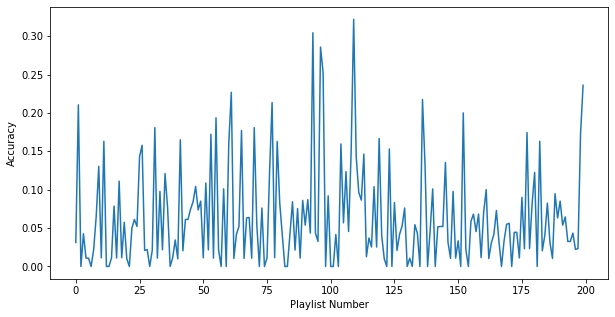

In [183]:
plt.figure(figsize = (10,5))
plt.plot(prediction_accuracy)
plt.xlabel('Playlist Number')
plt.ylabel('Accuracy')
plt.draw()
plt.savefig('accuracy_prediction.png')

In [173]:
#average prediction accuracy
np.mean(prediction_accuracy)

0.06449960050012628

The ratio between the number of songs in the possibility pool that overlap with the test songs and the total number of test songs. We refer to this as the possible prediction accuracy and we show a plot of it below. 

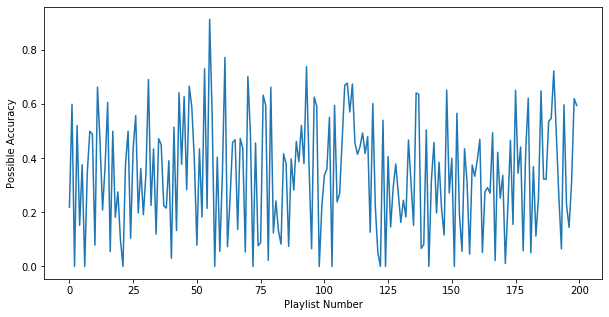

In [184]:
plt.figure(figsize = (10,5))
plt.plot(prediction_accuracy_total_songs)
plt.xlabel('Playlist Number')
plt.ylabel('Possible Accuracy')
plt.draw()
plt.savefig('possible_accuracy_prediction.png')

In [175]:
#average possible prediction accuracy
np.mean(prediction_accuracy_total_songs)

0.34176320480919586

Save prediction to file as pickled variables or read them if already saved.

In [185]:
#with open('playlist_accuracies.pkl', 'wb') as fp:
#    pickle.dump([prediction_accuracy,prediction_accuracy_total_songs], fp)

In [ ]:
with open('playlist_accuracies.pkl', 'rb') as f:
    prediction_accuracy,prediction_accuracy_total_songs = pickle.load(f)